**_<div style="text-align: center"> - - -   Ahmed Gurbuz | SMU Data Science Bootcamp   - - -</div>_**

# WeatherPy
----

#### This Python script visualizes the weather of randomly selected 500+ cities across the world of varying distance from the equator and builds a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow
from pprint import pprint

# Import API key
from config import openweatherkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generating Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Performing API Calls
* Performing a weather check on each city using a series of successive API calls.
* Including a print log of each city as it'sbeing processed (with the city number and city name).



In [3]:
# Create a settings dictionary with your API key and preferred unit
params = {"units": "imperial", "appid": openweatherkey}

# Define base url derived from Open Weather API docs
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Create a for loop to see if query url built upon the base url works or not 
# Check first 10 cities API response objects
counter = 0
for city in cities:
    params['q'] = city
    if counter == 10:
        break
    response = requests.get(base_url, params = params)
    print(response)
    counter = counter + 1

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


In [4]:
#Create Data Frame for the features we will be analyzing for each city
data_df = pd.DataFrame(columns=['City','Cloudiness','Country','Date','Humidity','Lat','Lng', 'Max Temp', 'Wind Speed'])

In [5]:
#Create counters for the loop
set_count = 1
record_count = 1

#Create loop
#Gathering information from Openweather API for each city
for i, city in enumerate(cities): 
    params["q"] = city
    
    # Create conditional
    # Create a set for every 60 cities
    if (i % 60 == 0 and i > 50):
        set_count =+1
        record_count = 1
    # Giving a break while fetching data not to exceed API (Open Weather API restricts 60 calls per minute for free accounts)
        time.sleep(50)
    # Create try/except condition to catch and see that city information can be found or not from API call
    try:
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
        # Create get request to achieve response object and convert it into JSON
        response = requests.get(base_url, params = params).json()
        # Filling Data Frame with information fetched from API (API docs)
        data_df.loc[i, "City"] = city
        data_df.loc[i, "Cloudiness"] = response['clouds']['all']
        data_df.loc[i, "Country"] = response['sys']['country']      
        data_df.loc[i, "Date"] = response['dt']       
        data_df.loc[i, "Humidity"] = response['main']['humidity']  
        data_df.loc[i, "Lat"] = response['coord']['lat']
        data_df.loc[i, "Lng"] = response['coord']['lon']
        data_df.loc[i, "Max Temp"] = response['main']['temp_max']
        data_df.loc[i, "Wind Speed"] = response['wind']['speed']              
    # Print 'City not found' if the API request gets no response
    except:
        print(f"City not found. Skipping...") 
    record_count += 1
# Print out when data retrieval completed                 
print("Data retrieval finished")

Processing Record 1 of Set 1 | salalah
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | norman wells
Processing Record 4 of Set 1 | rio gallegos
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | pahrump
Processing Record 7 of Set 1 | coihaique
Processing Record 8 of Set 1 | la macarena
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | matamoros
Processing Record 13 of Set 1 | egvekinot
Processing Record 14 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 15 of Set 1 | namibe
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | mount gambier
Processing Record 18 of Set 1 | mar del plata
Processing Record 19 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 20 of Set 1 | nome
Processing Record 21 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 22 of Set 1 | wanning
Process

Processing Record 12 of Set 1 | sao joao da barra
Processing Record 13 of Set 1 | askiz
Processing Record 14 of Set 1 | batemans bay
Processing Record 15 of Set 1 | burnie
Processing Record 16 of Set 1 | siddipet
Processing Record 17 of Set 1 | raga
City not found. Skipping...
Processing Record 18 of Set 1 | prince rupert
Processing Record 19 of Set 1 | emilio carranza
Processing Record 20 of Set 1 | paratinga
Processing Record 21 of Set 1 | lavrentiya
Processing Record 22 of Set 1 | qaqortoq
Processing Record 23 of Set 1 | nurota
Processing Record 24 of Set 1 | tuktoyaktuk
Processing Record 25 of Set 1 | novobiryusinskiy
Processing Record 26 of Set 1 | basoko
Processing Record 27 of Set 1 | gallup
Processing Record 28 of Set 1 | ancud
Processing Record 29 of Set 1 | saldanha
Processing Record 30 of Set 1 | sisimiut
Processing Record 31 of Set 1 | sudak
Processing Record 32 of Set 1 | narsaq
Processing Record 33 of Set 1 | miquelon
Processing Record 34 of Set 1 | svetlyy
City not found

Processing Record 15 of Set 1 | clyde river
Processing Record 16 of Set 1 | montelibano
Processing Record 17 of Set 1 | meulaboh
Processing Record 18 of Set 1 | tarko-sale
Processing Record 19 of Set 1 | mukhen
Processing Record 20 of Set 1 | vossevangen
Processing Record 21 of Set 1 | nemuro
Processing Record 22 of Set 1 | cabra
Processing Record 23 of Set 1 | airai
Processing Record 24 of Set 1 | pamanukan
Processing Record 25 of Set 1 | watsa
Processing Record 26 of Set 1 | vestbygda
City not found. Skipping...
Processing Record 27 of Set 1 | andenes
City not found. Skipping...
Processing Record 28 of Set 1 | sidi ali
Processing Record 29 of Set 1 | bontang
Processing Record 30 of Set 1 | college
Processing Record 31 of Set 1 | gillette
Processing Record 32 of Set 1 | caiaponia
Processing Record 33 of Set 1 | blackwater
Processing Record 34 of Set 1 | mahebourg
Processing Record 35 of Set 1 | houma
Processing Record 36 of Set 1 | sola
Processing Record 37 of Set 1 | mocambique
City 

Processing Record 23 of Set 1 | bouza
Processing Record 24 of Set 1 | chaozhou
Processing Record 25 of Set 1 | jieshou
Processing Record 26 of Set 1 | brigantine
Processing Record 27 of Set 1 | lata
Processing Record 28 of Set 1 | lufilufi
Processing Record 29 of Set 1 | tyukalinsk
Processing Record 30 of Set 1 | emerald
Processing Record 31 of Set 1 | lamu
Processing Record 32 of Set 1 | mehamn
Processing Record 33 of Set 1 | imuris
Processing Record 34 of Set 1 | tabas
Processing Record 35 of Set 1 | lamar
Processing Record 36 of Set 1 | quimper
Processing Record 37 of Set 1 | mokolo
Processing Record 38 of Set 1 | kodoli
Processing Record 39 of Set 1 | pangnirtung
Processing Record 40 of Set 1 | souillac
Processing Record 41 of Set 1 | mobaye
Processing Record 42 of Set 1 | salaverry
Processing Record 43 of Set 1 | tostamaa
City not found. Skipping...
Processing Record 44 of Set 1 | santa rosa
Processing Record 45 of Set 1 | waw
City not found. Skipping...
Processing Record 46 of Se

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Export the city data into a csv file
data_csv = data_df.to_csv(r"C:\Users\AG\Documents\SMU_Assignments\Unit_06_API\data.csv", index = None, header=True)

In [7]:
# Display the Data Frame
data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,salalah,40,OM,1569818377,78,17.01,54.1,82.4,8.05
1,thompson,5,CA,1569818378,74,55.74,-97.86,28.4,4.7
2,norman wells,75,CA,1569818378,48,65.28,-126.83,42.8,5.82
3,rio gallegos,0,AR,1569818378,94,-51.62,-69.22,32,13.87
4,castro,75,CL,1569818378,100,-42.48,-73.76,39.2,4.7
5,pahrump,1,US,1569818379,11,36.21,-115.98,64.4,18.34
6,coihaique,20,CL,1569818379,99,-45.58,-72.07,39.2,6.93
7,la macarena,67,CO,1569818379,98,2.18,-73.79,70.61,2.82
8,ushuaia,75,AR,1569818281,95,-54.81,-68.31,32,11.41
9,carnarvon,50,ZA,1569818379,56,-30.97,22.13,47.21,18.88


In [8]:
# Ignoring the rows that include missing data 
data_df.dropna(inplace= True)

# Converting unix date format into readable version
data_df['Date'] = pd.to_datetime(data_df['Date'],unit='s')

# Display cleaned Data Frame
data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,salalah,40,OM,2019-09-30 04:39:37,78,17.01,54.1,82.4,8.05
1,thompson,5,CA,2019-09-30 04:39:38,74,55.74,-97.86,28.4,4.7
2,norman wells,75,CA,2019-09-30 04:39:38,48,65.28,-126.83,42.8,5.82
3,rio gallegos,0,AR,2019-09-30 04:39:38,94,-51.62,-69.22,32,13.87
4,castro,75,CL,2019-09-30 04:39:38,100,-42.48,-73.76,39.2,4.7
5,pahrump,1,US,2019-09-30 04:39:39,11,36.21,-115.98,64.4,18.34
6,coihaique,20,CL,2019-09-30 04:39:39,99,-45.58,-72.07,39.2,6.93
7,la macarena,67,CO,2019-09-30 04:39:39,98,2.18,-73.79,70.61,2.82
8,ushuaia,75,AR,2019-09-30 04:38:01,95,-54.81,-68.31,32,11.41
9,carnarvon,50,ZA,2019-09-30 04:39:39,56,-30.97,22.13,47.21,18.88


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

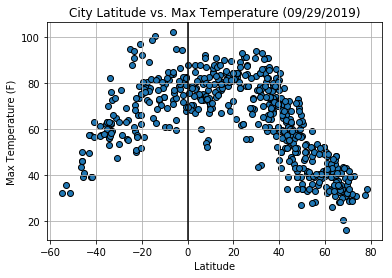

In [9]:
# Create scatter plot to compare Lattitude and Max Temp. of the randomly selected cities in the Data Frame
plt.scatter(data_df["Lat"], data_df["Max Temp"], edgecolor = 'black')

# Give the chart a title, x label, y label and grid
plt.title("City Latitude vs. Max Temperature (09/29/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Plot grid
plt.grid(True)

#Plot vertical line at 0 latitude (equator)
plt.axvline(x=0, color = 'black')

# Save the Figure
plt.savefig(r"C:\Users\AG\Documents\SMU_Assignments\Unit_06_API\plots\lat_and_max_temp.png")

# Show the Figure
plt.show()

#### Latitude vs. Humidity Plot

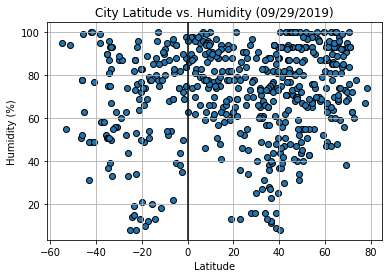

In [10]:
# Create scatter plot to compare Lattitude and Max Temp. of the randomly selected cities in the Data Frame
plt.scatter(data_df["Lat"], data_df["Humidity"], edgecolor = 'black')

# Give the chart a title, x label, y label and grid
plt.title("City Latitude vs. Humidity (09/29/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Plot grid
plt.grid(True)

#Plot vertical line at 0 latitude (equator)
plt.axvline(x=0, color = 'black')

# Save the Figure
plt.savefig(r"C:\Users\AG\Documents\SMU_Assignments\Unit_06_API\plots\lat_and_humidity.png")

# Show the Figure
plt.show()

#### Latitude vs. Cloudiness Plot

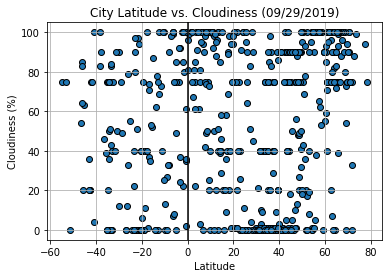

In [11]:
# Create scatter plot to compare Lattitude and Max Temp. of the randomly selected cities in the Data Frame
plt.scatter(data_df["Lat"], data_df["Cloudiness"], edgecolor = 'black')

# Give the chart a title, x label, y label and grid
plt.title("City Latitude vs. Cloudiness (09/29/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Plot grid
plt.grid(True)

#Plot vertical line at 0 latitude (equator)
plt.axvline(x=0, color = 'black')

# Save the Figure
plt.savefig(r"C:\Users\AG\Documents\SMU_Assignments\Unit_06_API\plots\lat_and_cloudiness.png")

# Show the Figure
plt.show()

#### Latitude vs. Wind Speed Plot

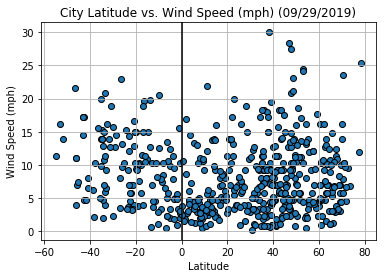

In [12]:
# Create scatter plot to compare Lattitude and Max Temp. of the randomly selected cities in the Data Frame
plt.scatter(data_df["Lat"], data_df["Wind Speed"], edgecolor = 'black')

# Give the chart a title, x label, y label and grid
plt.title("City Latitude vs. Wind Speed (mph) (09/29/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Plot grid
plt.grid(True)

# Plot vertical line at 0 latitude (equator)
plt.axvline(x=0, color = 'black')

# Save the Figure
plt.savefig(r"C:\Users\AG\Documents\SMU_Assignments\Unit_06_API\plots\lat_and_windspeed.png")

# Show the Figure
plt.show()